In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_df  = pd.read_csv("mnist_test.csv")
train_df = pd.read_csv("mnist_train.csv")

# (x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnsit.load_data()

In [3]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(60000, 785)

In [5]:
test_df.shape

(10000, 785)

In [6]:
test_df = test_df.values
train_df = train_df.values

In [7]:
x_train = train_df[:,1:]   #features
y_train = train_df[:,:1]   #labels

In [8]:
x_train.shape

(60000, 784)

In [9]:
y_train.shape

(60000, 1)

In [10]:
x_test = test_df[:,1:]   
y_test = test_df[:,:1]   

In [11]:
x_test.shape

(10000, 784)

In [12]:
y_test.shape

(10000, 1)

In [13]:
x_train = np.reshape(x_train,(60000,28,28))


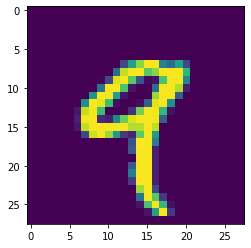

In [14]:
plt.imshow(x_train[4])

In [15]:
x_train = np.reshape(x_train,(60000,28,28,1))
x_train = x_train / 255.

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
x_test = np.reshape(x_test,(10000,28,28,1))
x_test = x_test / 255.

In [18]:
x_test.shape

(10000, 28, 28, 1)

In [19]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [20]:
test_df  = pd.read_csv("mnist_test.csv").values
train_df = pd.read_csv("mnist_train.csv").values

In [21]:
x_train = train_df[:,1:]   
y_train = train_df[:,:1]  

x_train = np.reshape(x_train,(60000,28,28,1))

x_train = x_train / 255.

In [22]:
x_test = test_df[:,1:]   
y_test = test_df[:,:1]   

x_test = np.reshape(x_test,(10000,28,28,1))

x_test = x_test / 255.

CNN 

In [23]:
model = Sequential()

model.add(Conv2D(filters = 28, kernel_size = (3,3), input_shape = (28,28,1) ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.fit(x = x_train, y=y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2045 - accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0823 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0449 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0362 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0299 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0234 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0190 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9859


[0.05838273838162422, 0.9858999848365784]

In [26]:
import cv2 as cv

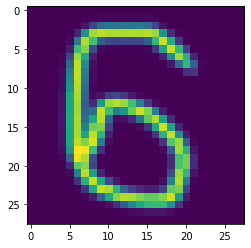

number is - 6


In [27]:
img = cv.imread("Test/six.png")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_img = cv.resize(gray_img,(28,28))
gray_img = gray_img / 255.
gray_img = 1 - gray_img

plt.imshow(gray_img)
plt.show()

gray_img = np.resize(gray_img,(1,28,28,1))
print("number is -",np.argmax(model.predict(gray_img)))

# SAVING THE MODEL

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [29]:
model.save("CNN_DIGIT.mdl")

INFO:tensorflow:Assets written to: CNN_DIGIT.mdl\assets
